In [1]:
import torch
DATA = 'SVHN'
prefix = 'svhn_dnn_kl_d_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = 'KL_D'
print(torch.cuda.get_device_name(0))

Tesla V100-SXM2-16GB


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Mounted at /content/gdrive


In [3]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=0e4be2e47ee43b16cabd460389f1677a6eb6c090b77e10262c3cb0036e1fa541
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


##Fetching the dataset and preparing train, validation and test data loaders

In [5]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))

Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/train_32x32.mat
Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/test_32x32.mat



73257 18222 7810 26032


##Visualising the data

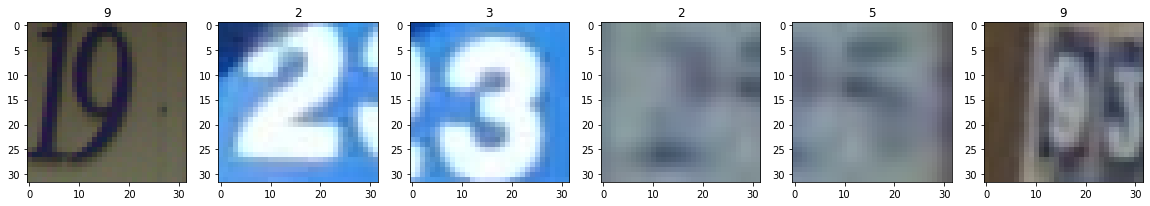

In [6]:
plot_samples(trainSet, None)

In [7]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(3, 6, 5, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryRelu(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [8]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [9]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(1,1/3)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.72274655 and Accuracy: 78.90%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.63513190 and Accuracy: 81.09%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.63092542 and Accuracy: 81.06%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.51523709 and Accuracy: 84.62%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.51294720 and Accuracy: 84.69%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.44779453 and Accuracy: 86.46%
Saving the model state dictionary for Epoch: 18 with Validation loss: 0.44009656 and Accuracy: 86.71%
Saving the model state dictionary for Epoch: 27 with Validation loss: 0.43033192 and Accuracy: 86.80%
Saving the model state dictionary for Epoch: 35 with Validation loss: 0.42423472 and Accuracy: 87.27%
Saving the model state dictionary for Epoch: 43 with Validation loss: 0.42362481 and Ac

In [10]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8897, device='cuda:0')


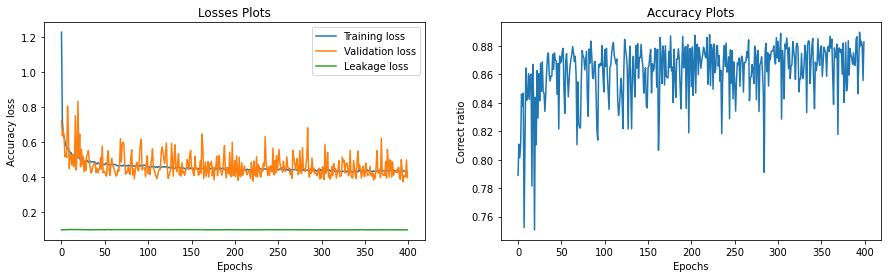

In [11]:
plot_losses()


Test accuracy: 0.8942381562099871


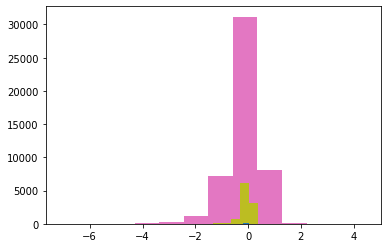

In [12]:
test_model()

##Measuring Privacy Preserving

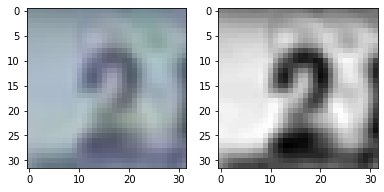

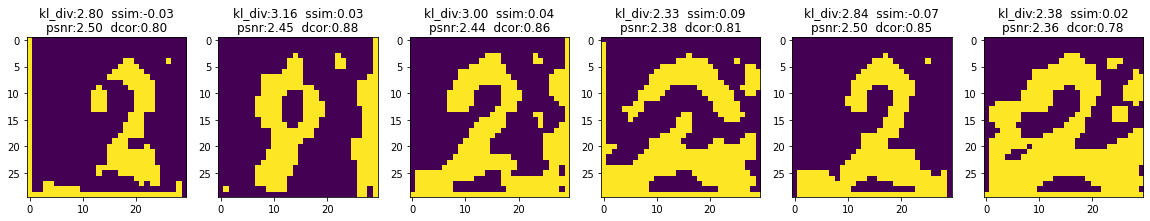

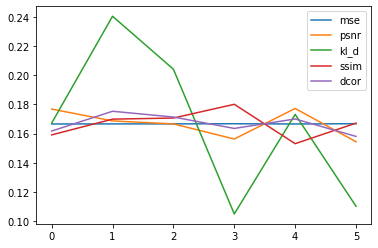

In [13]:
plot_measure(measure_image(testSet[1][0]))


tensor(3.0214, device='cuda:0') 0.7500288716610742 tensor(0.0494, device='cuda:0')


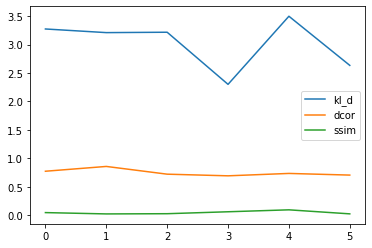

In [14]:
plot_measures(measure_images())